In [20]:
import getdist
from cobaya.yaml import yaml_load_file
from cobaya.run import run
from getdist import MCSamples, plots
from cobaya import load_samples
import matplotlib.pyplot as plt

info_from_yaml = yaml_load_file("N_eff_act6.yaml")

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

%matplotlib inline

In [23]:
full_chain = load_samples("chains/act6lite", skip=0.1, to_getdist=True)

# Create a subplot plotter instance for multi-parameter (triangle and 2D) plots.
g = plots.getSubplotPlotter()

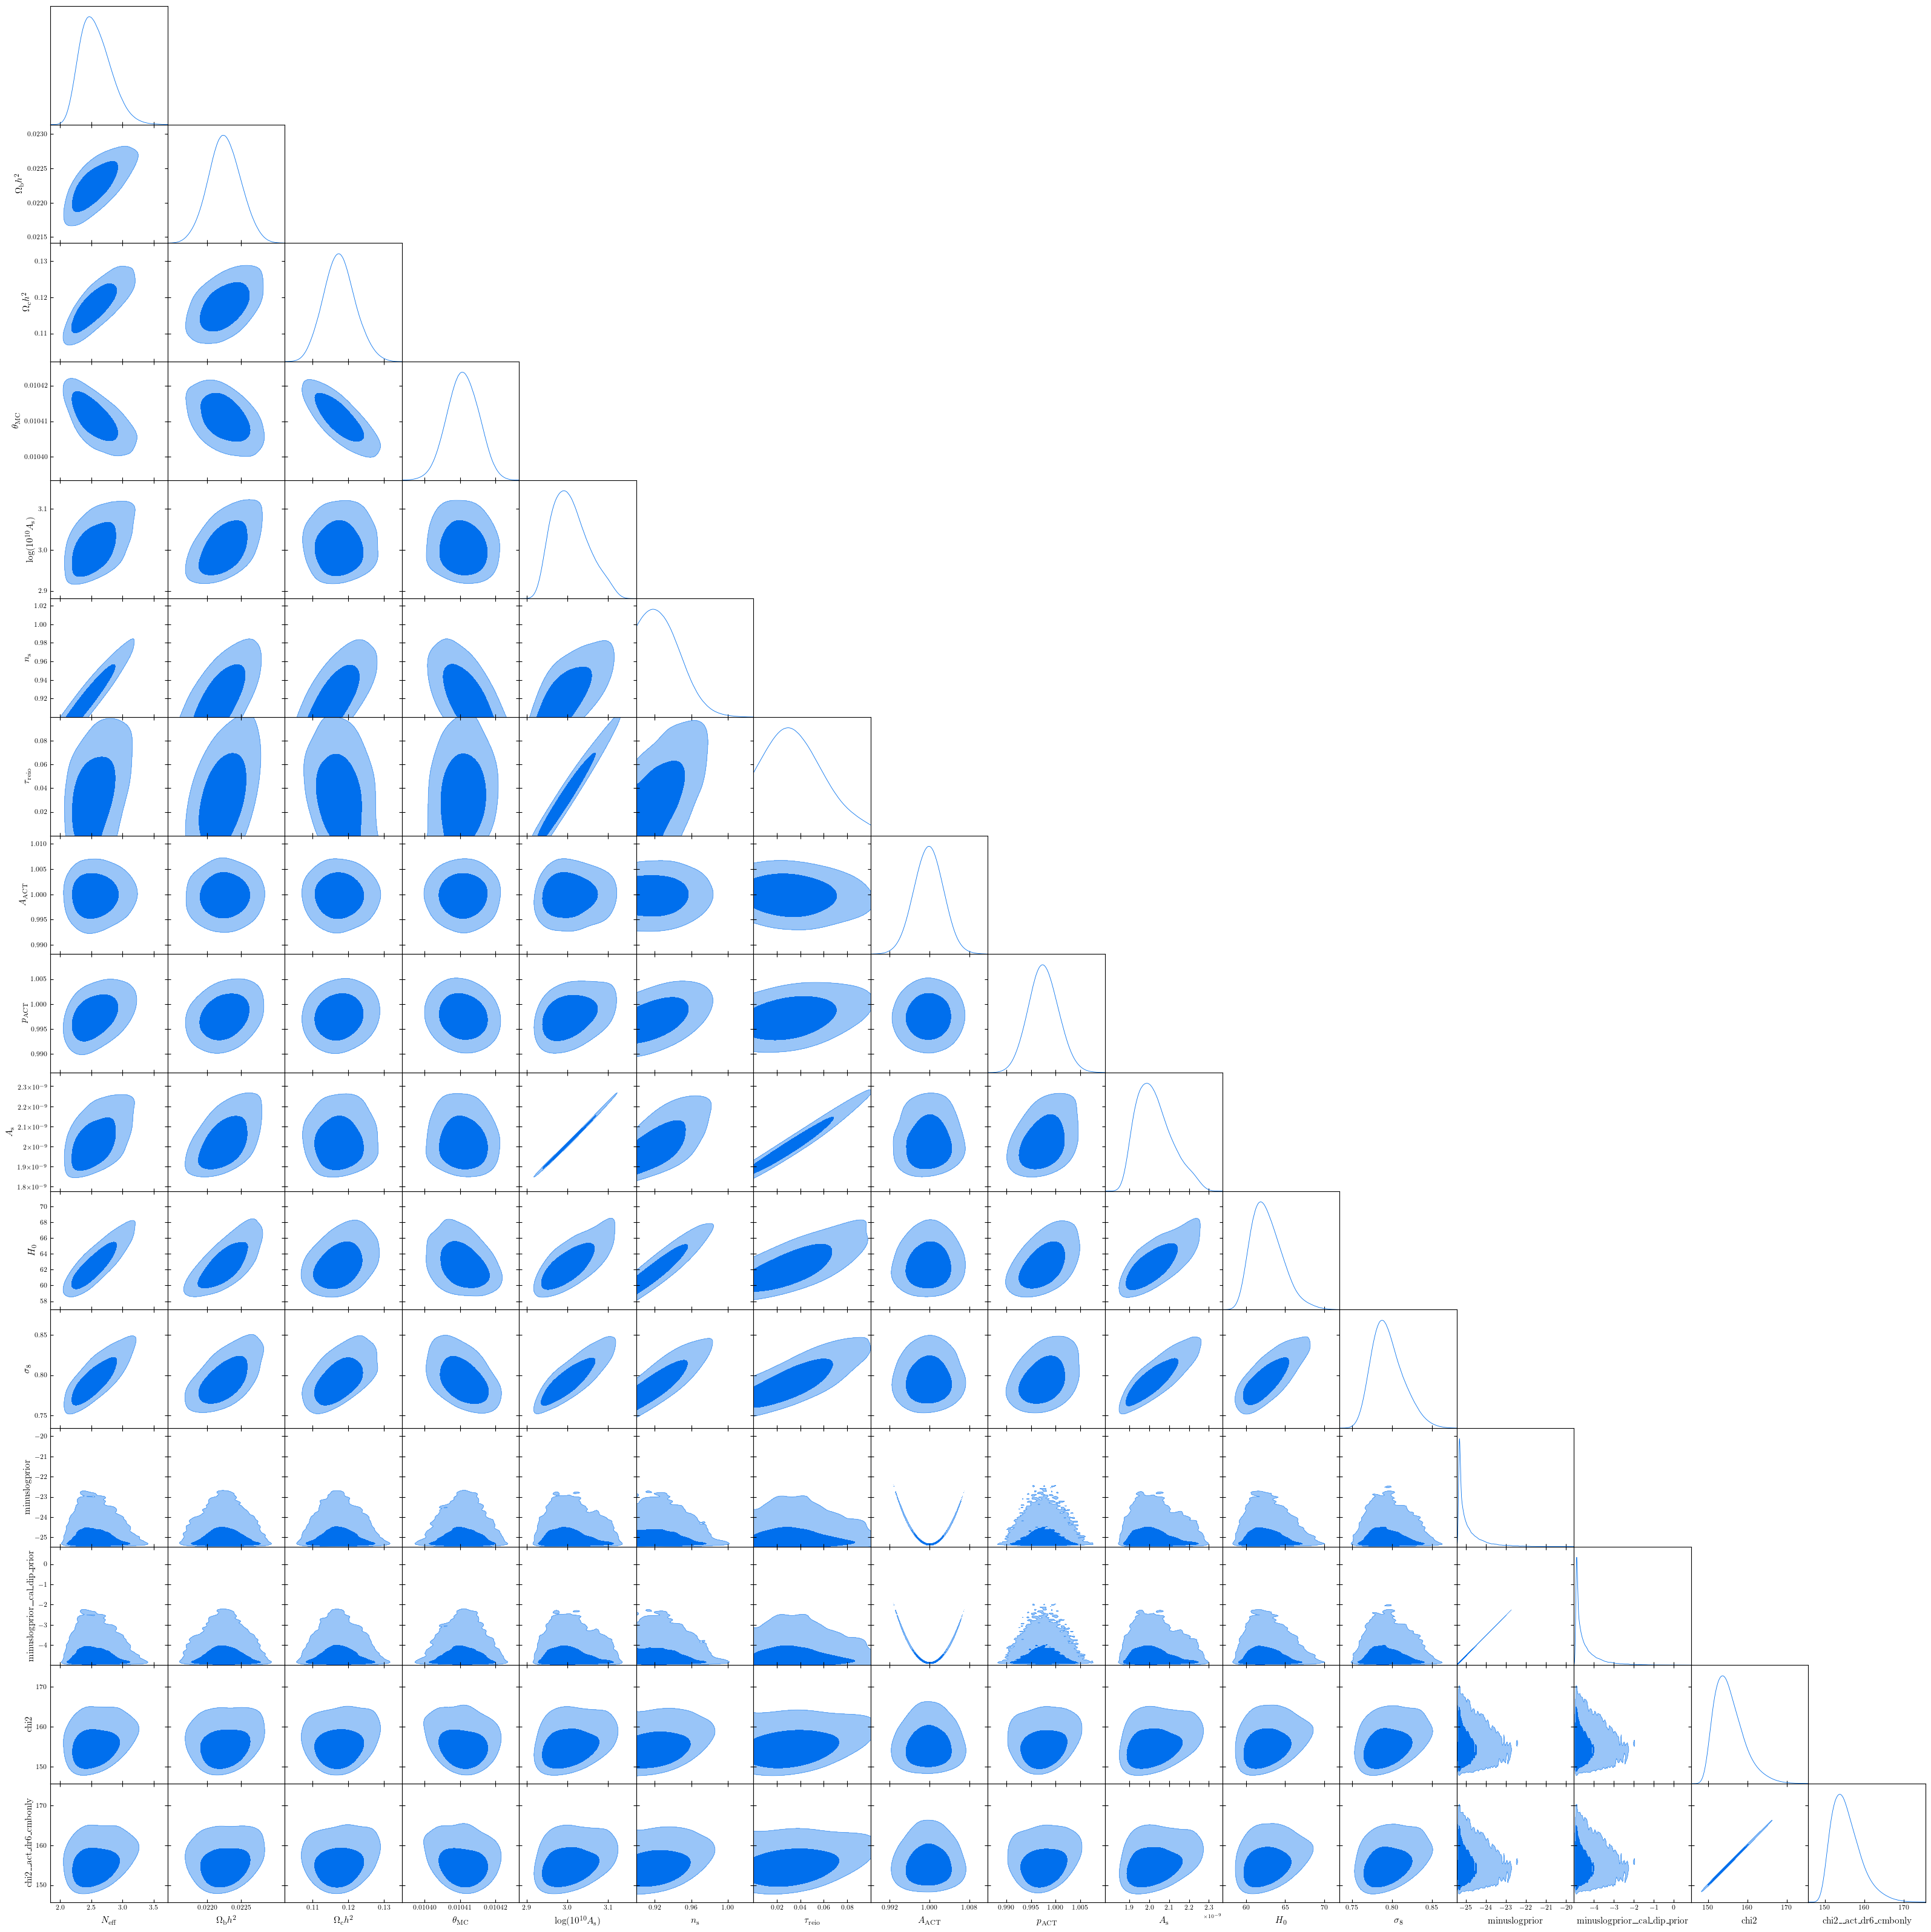

In [26]:
# 1. Triangle Plot (Corner Plot) of All Parameters
g.triangle_plot(full_chain, filled=True)
#g.export('triangle_plot.pdf')
plt.show()

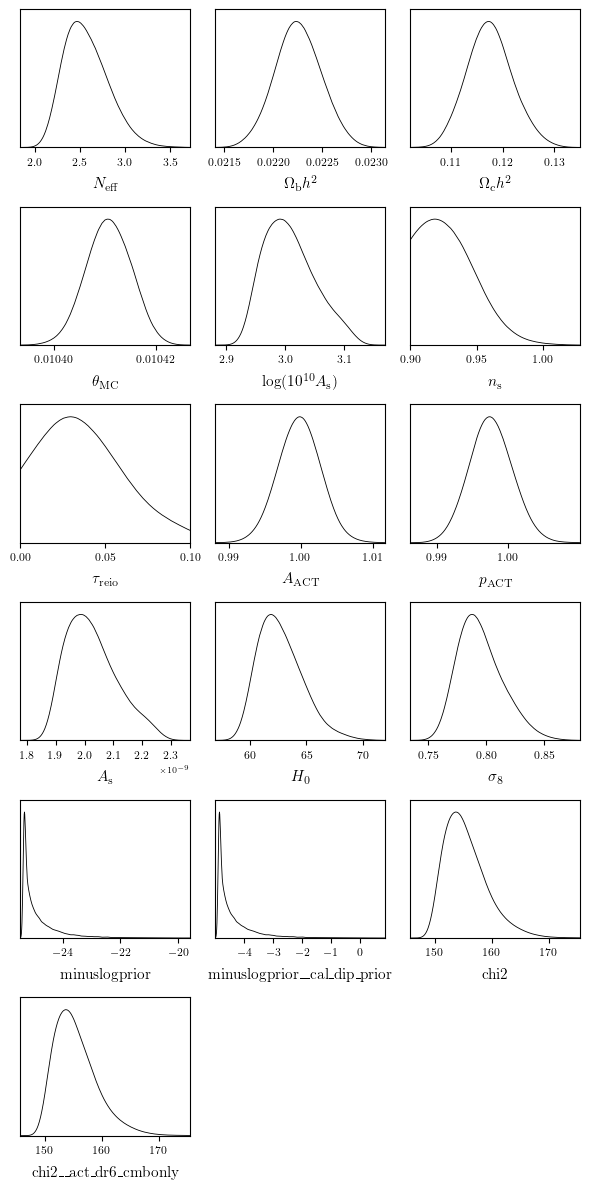

In [24]:
# 2. 1D Marginalized Plot for N_eff (assuming parameter is called 'nnu')
g.plots_1d(full_chain, parameters=['nnu'], filled=True)
#g.export('nnu_1d.pdf')
plt.show()

In [ ]:
# 3. 2D Contour Plot: For example, N_eff vs H_0 (make sure parameter names match your chain)
g.plots_2d(full_chain, 'nnu', 'H0', filled=True)
g.export('nnu_H0_2d.pdf')
plt.show()

In [ ]:
# 4. Single-Parameter 1D Plot for just N_eff
# Use a single plotter to only display the 1D posterior of nnu.
g_single = plots.getSinglePlotter()
g_single.plots_1d(full_chain, parameters=['nnu'], filled=True)
g_single.export('nnu_only.pdf')

In [19]:
nnu_chain = full_chain.onlyForParams(['nnu'])

# Create a single plotter instance and plot only the 'nnu' posterior
g_single = plots.getSinglePlotter()
g_single.plots_1d(nnu_chain, filled=True)
plt.show()

AttributeError: 'MCSamples' object has no attribute 'onlyForParams'

In [25]:
# 5. Print summary statistics for all parameters
summary = full_chain.getMargeStats()
print(summary)

Marginalized limits: 0.68; 0.95; 0.99

parameter                      mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
nnu                            2.5693029E+00  2.4787148E-01  2.2798673E+00  2.7612646E+00  two    2.1322286E+00  3.0657443E+00  two    2.0517990E+00  3.2733634E+00  two     N_{\rm eff}
ombh2                          2.2255399E-02  2.3770231E-04  2.2021800E-02  2.2493294E-02  two    2.1790852E-02  2.2736206E-02  two    2.1666735E-02  2.2856443E-02  two     \Omega_\mathrm{b}h^2
omch2                          1.1754607E-01  4.4410370E-03  1.1286517E-01  1.2168806E-01  two    1.0919037E-01  1.2653562E-01  two    1.0723655E-01  1.2961296E-01  two     \Omega_\mathrm{c}h^2
cosmomc_theta                  1.0410806E-02  4.4374161E-06  1.0406328E-02  1.0415396E-02  two    1.0402098E-02  1.0419281E-02  two    1.0399065E-02  1.0421921E-02  two     \theta_\mathrm{MC}
logA                   